In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import sys, os
root = os.path.join(os.getcwd(), '../')
sys.path.append(root)

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline

# Check Distgen Input

In [2]:
from distgen import Generator
from distgen.plot import plot_2d, plot_current_profile

DISTGEN_INPUT_FILE = os.path.join(root, 'templates/eic_precool_injector/cu_gun/distgen.in.yaml')
gen = Generator(DISTGEN_INPUT_FILE, verbose=0)
beam = gen.beam()

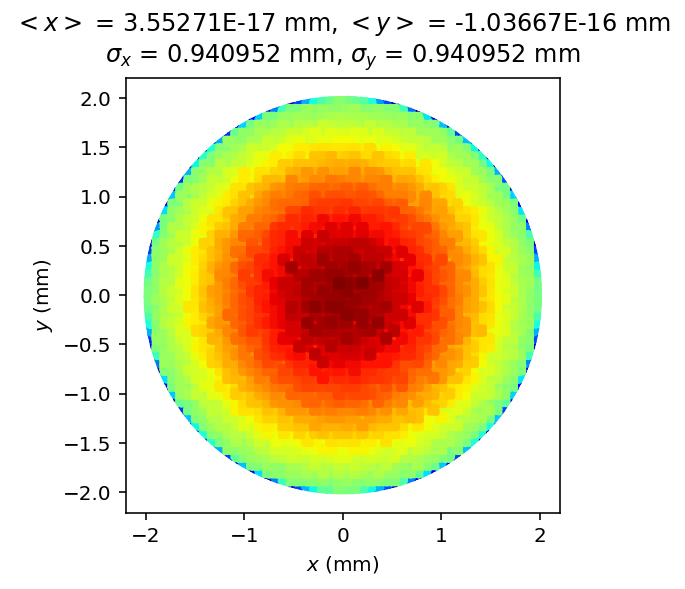

In [3]:
units = {'x':'mm', 'y':'mm', 'px':'keV/c', 'py':'keV/c', 't':'ps', 'q':'nC', 'I':'A'}
plot_2d(beam, 1, "x", units["x"], "y", units["y"], 'scatter_hist2d', nbins=50, axis="equal", title_on=True);

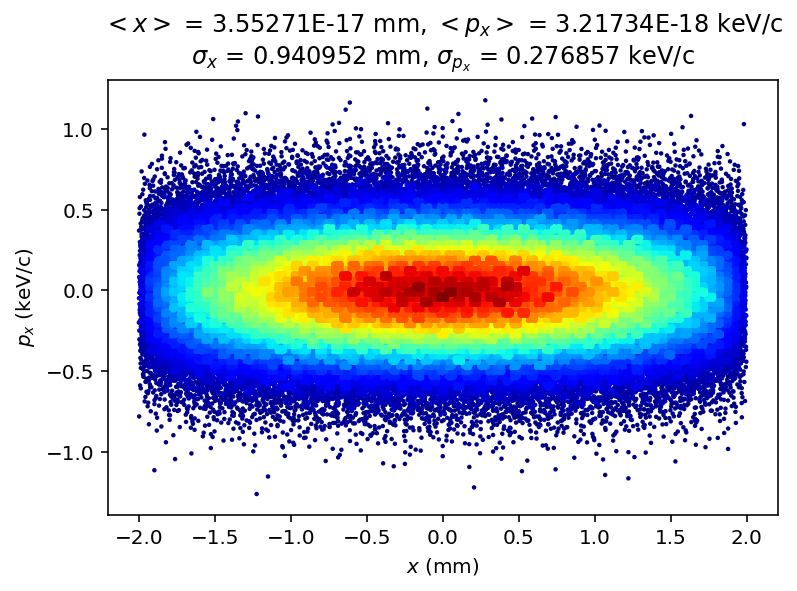

In [4]:
plot_2d(beam,1,"x",units["x"],"px",units["px"],'scatter_hist2d',nbins=75, title_on=True);

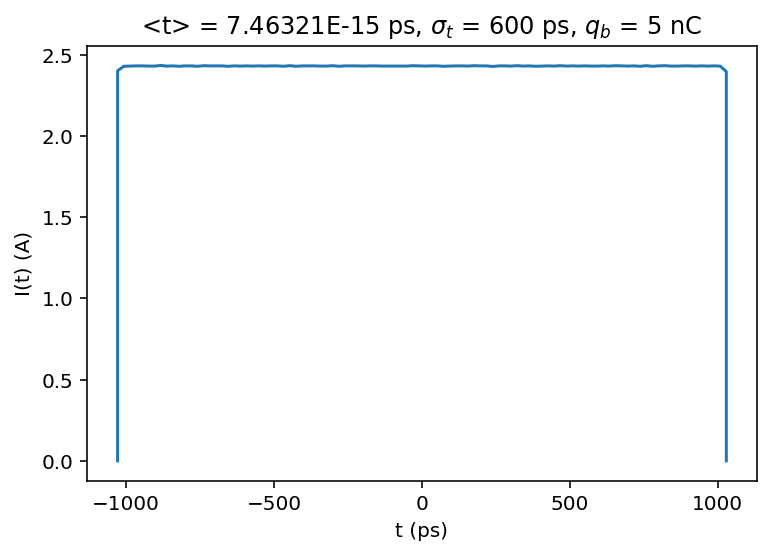

In [5]:
plot_current_profile(beam, 1, units, title_on=True)

# Run with Distgen


In [6]:
from gpt import GPT
from gpt.gpt_distgen import run_gpt_with_distgen

GPT_INPUT_FILE = os.path.join(root,'templates/eic_precool_injector/cu_gun/gpt.in')

settings = {
    'n_particle':200,
    'gun_voltage':400,
#    't_dist:sigma_t:value':25,
#    't_dist:sigma_t:units':'ps',
#    'total_charge:value':10,
#    'total_charge:units': 'pC'
}

G = run_gpt_with_distgen(settings,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         verbose=True,
                         auto_phase=False,
                         gpt_verbose=False)

print(G)

Run GPT with Distgen:
Replacing param n_particle with value 200
gun_voltage is in gpt
distgen_gpt_particles.gdf
Linking particle files, distgen output will point to -> "distgen_gpt_particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmp2dq69wox/distgen_gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 5 nC.
   Number of macroparticles: 200.
   r distribution: radial Gaussian
      Assuming cylindrical symmetry...
   t distribution: Super Gaussian
      simga_t = 0.6 ns, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 276.857 eV/c
   Scaling sigma_x -> 0.940952 mm
   Shifting avg_x -> 0 m
   Scaling sigma_y -> 0.940952 mm
   Shifting avg_y -> 0

[]


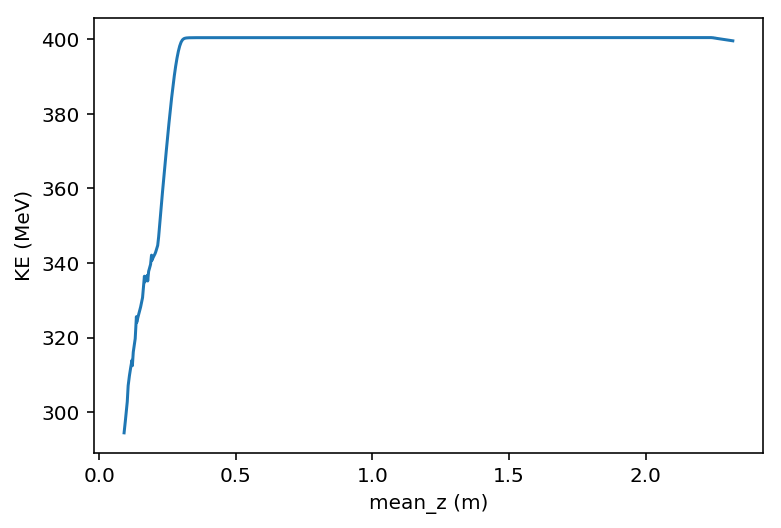

In [11]:
fig, ax = plt.subplots()
ax.plot(G.stat('mean_z'), G.stat('mean_kinetic_energy')/1e3)
ax.set_xlabel('mean_z (m)');
ax.set_ylabel('KE (MeV)');
print(G.screen)

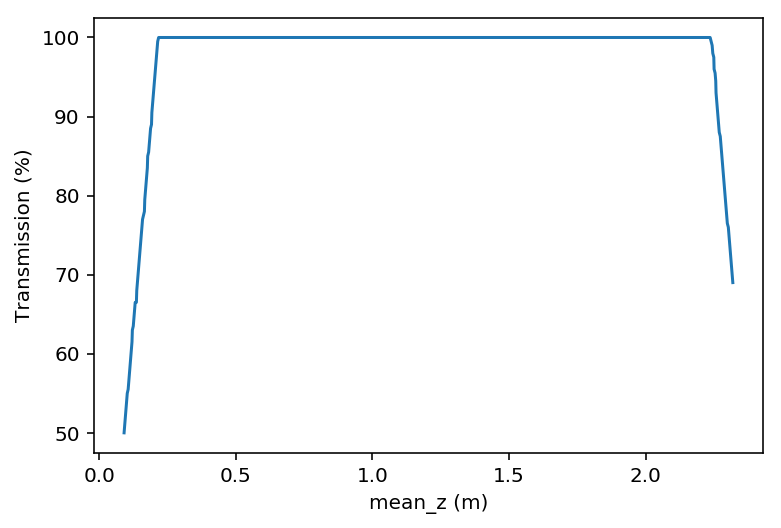

In [12]:
T = [100*len(P['x'])/settings['n_particle'] for P in G.output['particles']]
fig, ax = plt.subplots()
ax.plot(G.stat('mean_z'),T);
ax.set_xlabel('mean_z (m)');
ax.set_ylabel('Transmission (%)');

In [9]:
from gpt.evaluate import evaluate
print(G.screen)
result = evaluate(settings=settings,
                  simulation='gpt_with_distgen',
                  gpt_input_file=GPT_INPUT_FILE,
                  distgen_input_file=DISTGEN_INPUT_FILE,
                  verbose=False)

[]
distgen_gpt_particles.gdf


In [10]:
print(result)

{'error': False, 'fingerprint': '8145b5c5f0713081a5ea80584fbb7a4f'}
